# Quickstart Geospatial Data Visualisation in Python

## Notebook 2: Worked Example

##### Luke Roantree (data scientist) - ONS - SPIDAS (formerly Data Science Campus)
##### Produced for Government Geography Profession "Month of Maps" series

---

 ## Context

 #### I'm from Northern Ireland, and have an interest in the two main minority languages there - Irish and Ulster Scots. 
 #### We're going to use publicly available 2021 (NI) Census data obtained from NISRA to explore whether or not people who speak one of these languages are more, or less, likely to speak the other when compared to someone who doesn't.

 #### Census Data Source: [NISRA's Flexible Table Builder utility](https://build.nisra.gov.uk/en/)
 #### Map Data Source: [OpenDataNI](https://admin.opendatani.gov.uk/)

 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd

#### First, lets load the (public) census data
##### NISRA 2021 Census dataset, looking at minority languages and age on a Local Government District level

In [2]:
dataset_url = 'https://build.nisra.gov.uk/en/custom/table.csv?d=PEOPLE&v=LGD14&v=IRISH_SKILLS_INTERMEDIATE&v=ULSTER_SCOTS_SKILLS_INTERMEDIATE&~ULSTER_SCOTS_SKILLS_INTERMEDIATE=1+2+3+4+5+6&~IRISH_SKILLS_INTERMEDIATE=1+2+3+4+5+6'
df_NI_language = pd.read_csv(dataset_url)
df_NI_language.columns

Index(['Local Government District 2014 Code',
       'Local Government District 2014 Label', 'Irish (Ability) Code',
       'Irish (Ability) Label', 'Ulster-Scots (Ability) Code',
       'Ulster-Scots (Ability) Label', 'Count'],
      dtype='object')

#### Let's see what's in the `Irish (Ability) Label` and `Ulster-Scots (Ability) Label` options;

In [3]:
df_NI_language['Irish (Ability) Label'].unique(), df_NI_language['Ulster-Scots (Ability) Label'].unique()

(array(['Understands but does not read, write or speak Irish',
        'Speaks but does not read or write Irish',
        'Speaks and reads but does not write Irish',
        'Speaks, reads, writes and understands Irish',
        'Other combination of skills', 'No ability in Irish'], dtype=object),
 array(['Understands but does not read, write or speak Ulster-Scots',
        'Speaks but does not read or write Ulster-Scots',
        'Speaks and reads but does not write Ulster-Scots',
        'Speaks, reads, writes and understands Ulster-Scots',
        'Other combination of skills', 'No ability in Ulster-Scots'],
       dtype=object))

#### Lets filter it and prune some columns - we'll only count people who report all skills combinations in a language as 'having' Irish / Ulster Scots

In [4]:
df_NI_language['Has_Irish'] = df_NI_language['Irish (Ability) Label']=='Speaks, reads, writes and understands Irish'
df_NI_language['Has_Ulster-Scots'] = df_NI_language['Ulster-Scots (Ability) Label']=='Speaks, reads, writes and understands Ulster-Scots'

useful_cols = ['Local Government District 2014 Label', 
               'Has_Irish', 
               'Has_Ulster-Scots', 
               'Count']
df_NI_language = df_NI_language[useful_cols]

#### Now, we need to aggregate the rows which have the same LGD / Irish Ability / US Ability values:
This will give us 4 options per area (44 rows total)

In [5]:
df_NI_language = df_NI_language[useful_cols].groupby([
    'Local Government District 2014 Label', 
    'Has_Irish', 
    'Has_Ulster-Scots'
], as_index=False).sum()

# Now, to make things easier later, we'll going to rename the LGD column:
df_NI_language.rename(columns={'Local Government District 2014 Label':'LGDNAME'}, inplace=True)

df_NI_language.head(n=10)

,LGDNAME,Has_Irish,Has_Ulster-Scots,Count
0,Antrim and Newtownabbey,False,False,135680
1,Antrim and Newtownabbey,False,True,1662
2,Antrim and Newtownabbey,True,False,3347
3,Antrim and Newtownabbey,True,True,86
4,Ards and North Down,False,False,156114
5,Ards and North Down,False,True,1660
6,Ards and North Down,True,False,1148
7,Ards and North Down,True,True,82
8,"Armagh City, Banbridge and Craigavon",False,False,200275
9,"Armagh City, Banbridge and Craigavon",False,True,2243


#### Now we'll load in our geospatial data (Source: OpenDataNI)

In [6]:
geospatial_url = 'https://osni-spatialni.opendata.arcgis.com/api/download/v1/items/eaa08860c50045deb8c4fdc7fa3dac87/shapefile?layers=2'
df_NI_geometry = gpd.read_file(geospatial_url, engine='pyogrio')
df_NI_geometry

,LGDNAME,AREA,LGDCode,OBJECTID,geometry
0,Antrim and Newtownabbey,9.036142e+05,N09000001,1,"POLYGON Z ((319471.463 397521.103 0, 319485.04..."
1,"Armagh City, Banbridge and Craigavon",1.037929e+08,N09000002,2,"POLYGON Z ((311885.434 366349.968 0, 311904.58..."
2,Belfast,9.777570e+05,N09000003,3,"POLYGON Z ((334071.541 379980.088 0, 334098.69..."
3,Causeway Coast and Glens,1.187525e+08,N09000004,4,"MULTIPOLYGON Z (((297026.984 446000.593 0, 297..."
4,Derry City and Strabane,4.837549e+07,N09000005,5,"POLYGON Z ((247533.964 424601.021 0, 247536.21..."
5,Fermanagh and Omagh,3.813956e+07,N09000006,6,"POLYGON Z ((266555.385 392092.51 0, 266557.136..."
6,Lisburn and Castlereagh,3.437952e+07,N09000007,7,"POLYGON Z ((343348.406 376381.9 0, 343350.514 ..."
7,Mid and East Antrim,2.608725e+06,N09000008,8,"POLYGON Z ((329896.206 424716.479 0, 329900.10..."
8,Mid Ulster,1.370286e+08,N09000009,9,"POLYGON Z ((294150.193 412224.918 0, 294156.62..."
9,"Newry, Mourne and Down",3.296231e+06,N09000010,10,"POLYGON Z ((341276.619 362805.051 0, 341283.86..."


#### As before, we'll cut the columns that we don't need:

In [7]:
df_NI_geometry = df_NI_geometry[['LGDNAME', 'geometry']]

#### I'm not going to go through the next part in detail; essentially we build a dataframe of aggregate statistics for each LGD

In [8]:
# Now, lets make some aggregate statistics:

LGD_level_stats = df_NI_language.groupby(['LGDNAME']).sum()[['Count']].rename(columns={'Count':'total_population'})
LGD_level_stats['log_population'] = np.log10(LGD_level_stats['total_population'])

LGD_level_stats = LGD_level_stats.join(
    df_NI_language[df_NI_language['Has_Irish']].groupby(
        ['LGDNAME']).sum()[['Count']].rename(
            columns={'Count':'total_Has_Irish'}
    ),
    on='LGDNAME')

LGD_level_stats = LGD_level_stats.join(
    df_NI_language[df_NI_language['Has_Ulster-Scots']].groupby(
        ['LGDNAME']).sum()[['Count']].rename(
            columns={'Count':'total_Has_Ulster-Scots'}
    ),
    on='LGDNAME')

LGD_level_stats = LGD_level_stats.join(
    df_NI_language[df_NI_language['Has_Irish'] & df_NI_language['Has_Ulster-Scots']].groupby(
        ['LGDNAME']).sum()[['Count']].rename(
            columns={'Count':'Irish_&_US'}
    ),
    on='LGDNAME')

LGD_level_stats = LGD_level_stats.join(
    df_NI_language[df_NI_language['Has_Irish'] & ~df_NI_language['Has_Ulster-Scots']].groupby(
        ['LGDNAME']).sum()[['Count']].rename(
            columns={'Count':'Irish_&_~US'}
    ),
    on='LGDNAME')

LGD_level_stats = LGD_level_stats.join(
    df_NI_language[~df_NI_language['Has_Irish'] & df_NI_language['Has_Ulster-Scots']].groupby(
        ['LGDNAME']).sum()[['Count']].rename(
            columns={'Count':'~Irish_&_US'}
    ),
    on='LGDNAME')

LGD_level_stats = LGD_level_stats.join(
    df_NI_language[~df_NI_language['Has_Irish'] & ~df_NI_language['Has_Ulster-Scots']].groupby(
        ['LGDNAME']).sum()[['Count']].rename(
            columns={'Count':'~US_&_~Irish'}
    ),
    on='LGDNAME')

# Now calculate proportions:
LGD_level_stats['% Has Irish'] = 100*LGD_level_stats['total_Has_Irish'] / LGD_level_stats['total_population']
LGD_level_stats['% Has Ulster-Scots'] = 100*LGD_level_stats['total_Has_Ulster-Scots'] / LGD_level_stats['total_population']
LGD_level_stats['% Irish Speakers with Ulster-Scots'] = 100*LGD_level_stats['Irish_&_US'] / LGD_level_stats['total_Has_Irish']
LGD_level_stats['% Non Irish Speakers with Ulster-Scots'] = 100*LGD_level_stats['~Irish_&_US'] / (LGD_level_stats['total_population']-LGD_level_stats['total_Has_Irish'])
LGD_level_stats['% Ulster-Scots Speakers with Irish'] = 100*LGD_level_stats['Irish_&_US'] / LGD_level_stats['total_Has_Ulster-Scots'] 
LGD_level_stats['% Non Ulster-Scots Speakers with Irish'] = 100*LGD_level_stats['Irish_&_~US'] / (LGD_level_stats['total_population']-LGD_level_stats['total_Has_Ulster-Scots']) 

LGD_level_stats['Probability US speaker has Irish relative to Non-US speaker'] = LGD_level_stats['% Ulster-Scots Speakers with Irish']/LGD_level_stats['% Non Ulster-Scots Speakers with Irish']
LGD_level_stats['Probability Irish speaker has US relative to Non-Irish speaker'] = LGD_level_stats['% Irish Speakers with Ulster-Scots']/LGD_level_stats['% Non Irish Speakers with Ulster-Scots']

useful_stats_cols = [
    'total_population',
    'log_population',
    'total_Has_Irish',
    'total_Has_Ulster-Scots',
    'Probability US speaker has Irish relative to Non-US speaker',
    'Probability Irish speaker has US relative to Non-Irish speaker'
]

LGD_level_stats[useful_stats_cols]

,total_population,log_population,total_Has_Irish,total_Has_Ulster-Scots,Probability US speaker has Irish relative to Non-US speaker,Probability Irish speaker has US relative to Non-Irish speaker
LGDNAME,,,,,,
Antrim and Newtownabbey,140775,5.148526,3433,1748,2.043621,2.070127
Ards and North Down,159004,5.201408,1230,1742,6.448335,6.336305
"Armagh City, Banbridge and Craigavon",210400,5.323046,7882,2364,1.372015,1.386064
Belfast,333750,5.523421,17986,2551,1.889464,1.975348
Causeway Coast and Glens,137158,5.137221,4189,3230,1.159968,1.161308
Derry City and Strabane,145281,5.162209,7474,882,1.905755,1.992065
Fermanagh and Omagh,112549,5.051342,5837,935,1.574790,1.617499
Lisburn and Castlereagh,143764,5.157650,3062,1077,3.235681,3.341060
Mid Ulster,144036,5.158471,9545,1515,1.016147,1.017127


#### Now, we merge the 'map' GeoDataFrame and the 'census' DataFrame;

In [9]:
df_NI_visualisation = df_NI_geometry.join(LGD_level_stats, on='LGDNAME')
df_NI_visualisation[['LGDNAME', 'geometry']+useful_stats_cols]

,LGDNAME,geometry,total_population,log_population,total_Has_Irish,total_Has_Ulster-Scots,Probability US speaker has Irish relative to Non-US speaker,Probability Irish speaker has US relative to Non-Irish speaker
0,Antrim and Newtownabbey,"POLYGON Z ((319471.463 397521.103 0, 319485.04...",140775,5.148526,3433,1748,2.043621,2.070127
1,"Armagh City, Banbridge and Craigavon","POLYGON Z ((311885.434 366349.968 0, 311904.58...",210400,5.323046,7882,2364,1.372015,1.386064
2,Belfast,"POLYGON Z ((334071.541 379980.088 0, 334098.69...",333750,5.523421,17986,2551,1.889464,1.975348
3,Causeway Coast and Glens,"MULTIPOLYGON Z (((297026.984 446000.593 0, 297...",137158,5.137221,4189,3230,1.159968,1.161308
4,Derry City and Strabane,"POLYGON Z ((247533.964 424601.021 0, 247536.21...",145281,5.162209,7474,882,1.905755,1.992065
5,Fermanagh and Omagh,"POLYGON Z ((266555.385 392092.51 0, 266557.136...",112549,5.051342,5837,935,1.574790,1.617499
6,Lisburn and Castlereagh,"POLYGON Z ((343348.406 376381.9 0, 343350.514 ...",143764,5.157650,3062,1077,3.235681,3.341060
7,Mid and East Antrim,"POLYGON Z ((329896.206 424716.479 0, 329900.10...",134654,5.129219,1616,3260,2.377092,2.337317
8,Mid Ulster,"POLYGON Z ((294150.193 412224.918 0, 294156.62...",144036,5.158471,9545,1515,1.016147,1.017127
9,"Newry, Mourne and Down","POLYGON Z ((341276.619 362805.051 0, 341283.86...",175242,5.243638,9623,1619,1.274261,1.291377


#### Lets plot a single, simple choropleth map of population

<Axes: >

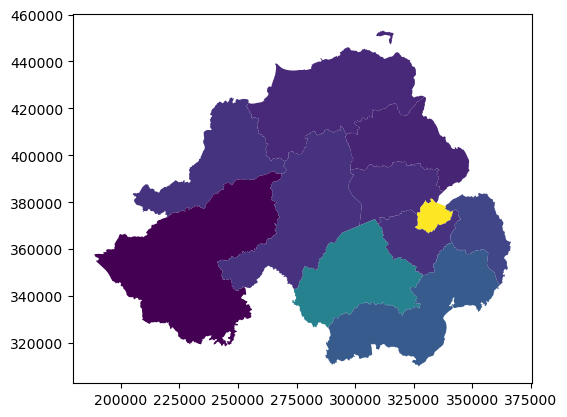

In [10]:
df_NI_visualisation.plot('total_population')

#### That isn't great - it's unclear what the axes are, there's no colorbar to explain the values, Belfast skews population visualisation, etc.
#### First: lets add a colourbar and plot $log($population$)$ instead

<Axes: >

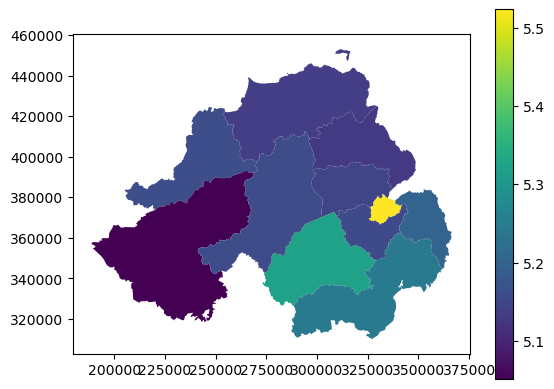

In [11]:
df_NI_visualisation.plot('log_population', legend=True)

#### That's a bit better.

#### Here's a few other things we can do to make it look nicer:
* change the colourmap,
* seperate out the colourbar so we can control it explicitly,
* increase the size of the figure, 
* add a title,
* make the LGD edges black
* remove axes around the map,
* directly plot the values in the middle of each LGD, 
* Adapt the font colour to LGD colour

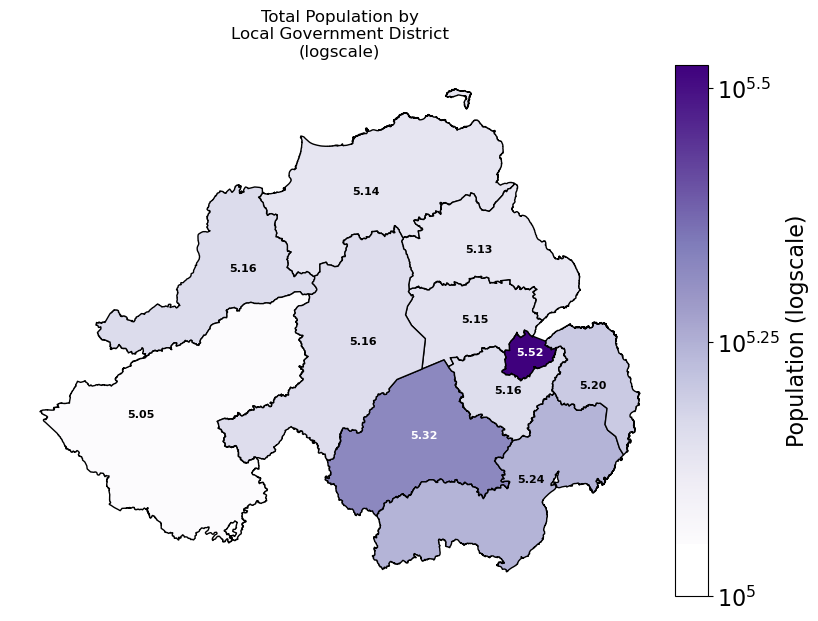

In [12]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots(1, 1, figsize=(9,9))

divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)

df_NI_visualisation.plot('log_population', 
                         legend=True, 
                         cmap='Purples', 
                         figsize=(9,9), 
                         edgecolor='black',
                         ax=ax,
                         cax=cax)

ax.set_title('Total Population by\nLocal Government District\n(logscale)')

ax.set_xticks([])
ax.set_yticks([])
ax.axes.set_axis_off()

cax.set_yticks([5,5.25,5.5],[r"$10^{5}$", r"$10^{5.25}$", r"$10^{5.5}$", ], fontsize=16)
cax.set_ylabel('Population (logscale)', fontsize=16)

for idx, row in df_NI_visualisation.iterrows():
    fontcolour = 'black' if row['log_population'] < 5.25 else 'white'
    ax.annotate(f"{row['log_population']:.2f}", 
                xy=[c for c in row['geometry'].representative_point().coords[0]],
                horizontalalignment='center', 
                color=fontcolour, 
                fontsize=8, 
                fontweight='heavy')

#### We'll finish with demoing multiple subplots in a more complex visualisation:

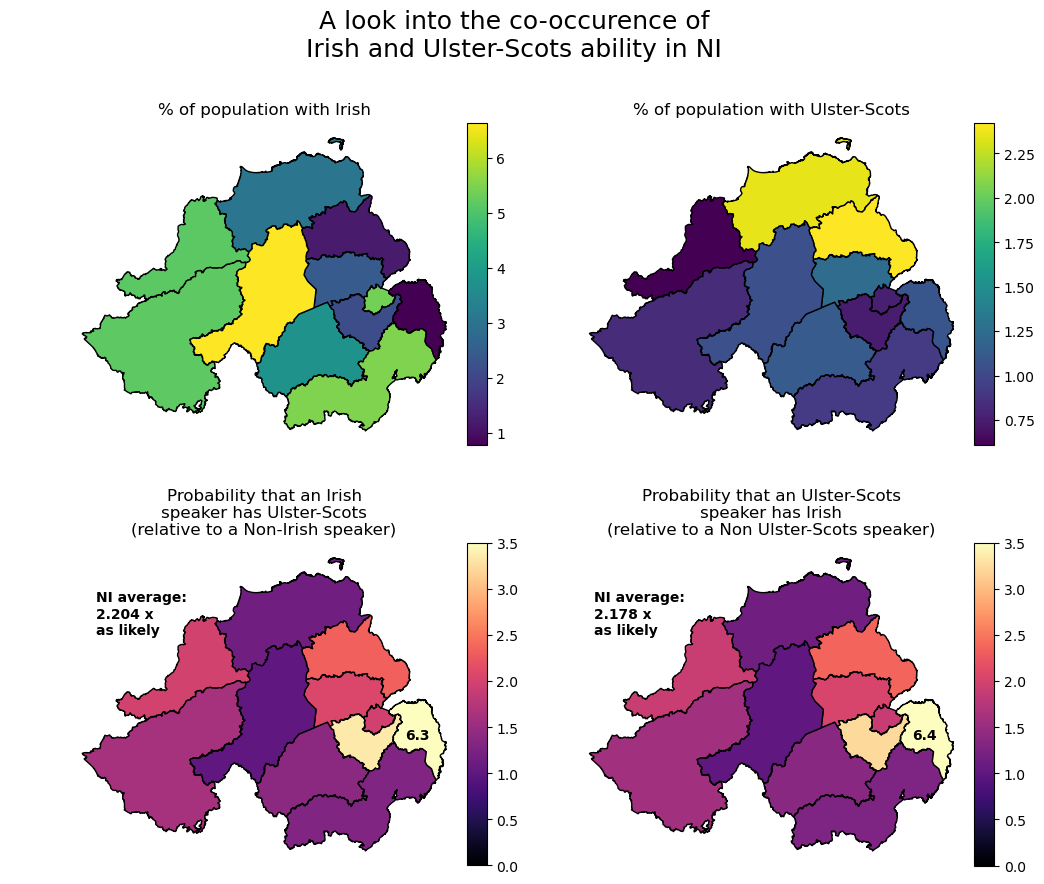

In [13]:
fig, ((ax1,ax2), (ax3,ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(12,10))

def make_choropleth(ax, column, title, cmap='viridis', min_val=None, max_val=None):
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='5%', pad=0.025)
    df_NI_visualisation.plot(column=column, 
               cmap=cmap, 
               legend=True, 
               ax=ax,
               cax=cax,
               edgecolor='k',
               vmin=min_val,
               vmax=max_val)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(title)
    ax.axes.set_axis_off()

make_choropleth(ax1, '% Has Irish', '% of population with Irish')
make_choropleth(ax2, '% Has Ulster-Scots', '% of population with Ulster-Scots')

make_choropleth(ax3, 
                'Probability Irish speaker has US relative to Non-Irish speaker', 
                'Probability that an Irish\nspeaker has Ulster-Scots\n(relative to a Non-Irish speaker)',
                'magma',
                0, 
                3.5)

make_choropleth(ax4, 
                'Probability US speaker has Irish relative to Non-US speaker', 
                'Probability that an Ulster-Scots\nspeaker has Irish\n(relative to a Non Ulster-Scots speaker)', 
                'magma',
                0, 
                3.5)

ax3.annotate(f"{df_NI_visualisation.iloc[10]['Probability Irish speaker has US relative to Non-Irish speaker']:.1f}", 
                xy=[c for c in df_NI_visualisation.iloc[10]['geometry'].representative_point().coords[0]],
                horizontalalignment='center', 
                color='black', 
                fontsize=10, 
                fontweight='heavy')

ax4.annotate(f"{df_NI_visualisation.iloc[10]['Probability US speaker has Irish relative to Non-US speaker']:.1f}", 
                xy=[c for c in df_NI_visualisation.iloc[10]['geometry'].representative_point().coords[0]],
                horizontalalignment='center', 
                color='black', 
                fontsize=10, 
                fontweight='heavy')

weighted_odds_I_US = df_NI_visualisation['total_population']*df_NI_visualisation['Probability Irish speaker has US relative to Non-Irish speaker']
NI_odds_I_US = weighted_odds_I_US.sum()/df_NI_visualisation['total_population'].sum()
ax3.annotate(f'NI average:\n{NI_odds_I_US:.3f} x\nas likely',
            (0.08,0.25), 
            xycoords='figure fraction', fontsize=10, fontweight='bold')

weighted_odds_US_I = df_NI_visualisation['total_population']*df_NI_visualisation['Probability US speaker has Irish relative to Non-US speaker']
NI_odds_US_I = weighted_odds_US_I.sum()/df_NI_visualisation['total_population'].sum()
ax4.annotate(f'NI average:\n{NI_odds_US_I:.3f} x\nas likely',
            (0.495,0.25), 
            xycoords='figure fraction', fontsize=10, fontweight='bold')

fig.suptitle('A look into the co-occurence of\nIrish and Ulster-Scots ability in NI', fontsize=18)

fig.savefig('Multi-plot_Irish_Ulster-Scots_NI.pdf', dpi=275, transparent=True, edgecolor=None)
fig.savefig('Multi-plot_Irish_Ulster-Scots_NI.png', dpi=275, transparent=False, edgecolor=None)